<a href="https://colab.research.google.com/github/taekyunglim/RGitHubTest/blob/master/Hard_Melbourn4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melbourn Data EDA

## 1. Package Load

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Hard_Melbourne4.csv')
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
0,0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,NaN
3,3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,NaN


In [ ]:
df.tail()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
23542,23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0,NaN
23543,23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0,NaN
23544,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0,NaN
23545,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,NaN
23546,23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26-08-2017,6.3,3013.0,4.0,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0,NaN


In [ ]:
df.shape

(23547, 23)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'Description'],
      dtype='object')

In [ ]:
df.info()
## Unnamed: 0 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23547 non-null  int64  
 1   Suburb         23547 non-null  object 
 2   Address        23547 non-null  object 
 3   Rooms          23547 non-null  int64  
 4   Type           23547 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         23547 non-null  object 
 7   SellerG        23547 non-null  object 
 8   Date           23547 non-null  object 
 9   Distance       23546 non-null  float64
 10  Postcode       23546 non-null  float64
 11  Bedroom2       19066 non-null  float64
 12  Bathroom       19063 non-null  float64
 13  Car            18921 non-null  float64
 14  Landsize       17410 non-null  float64
 15  BuildingArea   10018 non-null  float64
 16  YearBuilt      11540 non-null  float64
 17  CouncilArea    15656 non-null  object 
 18  Lattit

In [ ]:
df.describe()
## Rooms max 120 삭제
## Postcode 삭제
## Description 삭제
## Lattitude, Longtitude 삭제

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Description
count,23547.00000,23547.000000,1.839600e+04,23546.000000,23546.000000,19066.000000,19063.000000,18921.000000,17410.000000,10018.000000,11540.000000,19243.000000,19243.000000,23546.000000,0.0
mean,11773.00000,2.981102,1.056697e+06,10.304222,3109.782893,2.951956,1.570897,1.626235,551.783458,154.527895,1964.636742,-37.812434,145.000287,7517.480591,NaN
std,6797.57773,1.237364,6.419217e+05,6.019455,94.522190,0.996032,0.712684,0.974048,3544.288014,462.535765,37.595504,0.079926,0.106071,4414.995634,NaN
min,0.00000,1.000000,8.500000e+04,-13.900000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,129.000000,NaN
25%,5886.50000,2.000000,6.330000e+05,6.200000,3047.000000,2.000000,1.000000,1.000000,181.000000,95.000000,1940.000000,-37.859300,144.939300,4385.000000,NaN
50%,11773.00000,3.000000,8.800000e+05,9.500000,3101.000000,3.000000,1.000000,2.000000,448.000000,129.000000,1970.000000,-37.809700,145.004300,6567.000000,NaN
75%,17659.50000,4.000000,1.302000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,656.000000,180.000000,2000.000000,-37.759800,145.063100,10331.000000,NaN
max,23546.00000,120.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.407580,145.526350,21650.000000,NaN


## 2. Visualization

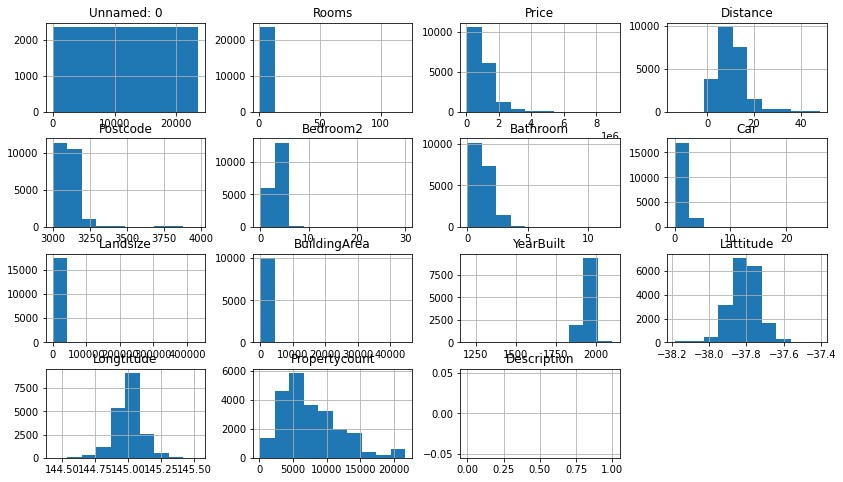

In [ ]:
plt.rcParams['figure.figsize'] = [14, 8]
hist = df.hist()

Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'YearBuilt'], dtype='object')


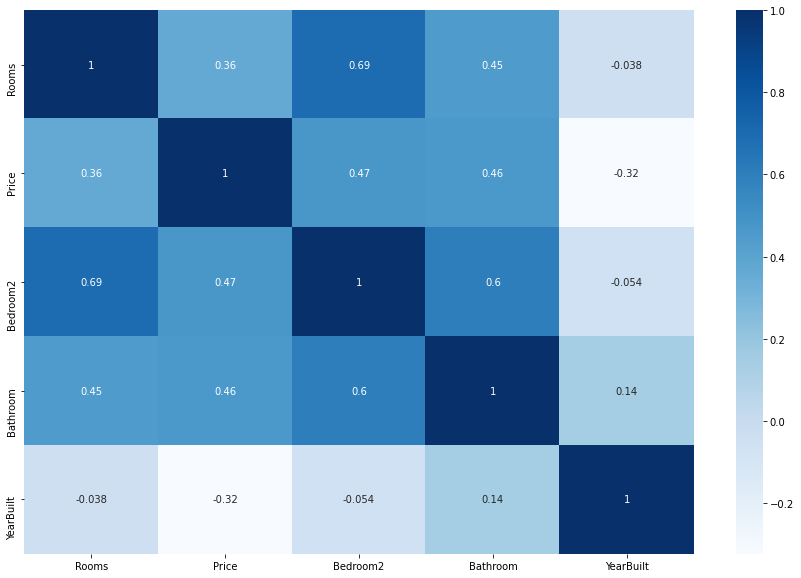

In [ ]:
cormat = df.corr()
top_corr_features = cormat.index[abs(cormat['Price']) >= 0.3]
print(top_corr_features)
plt.figure(figsize = (15, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'Blues')

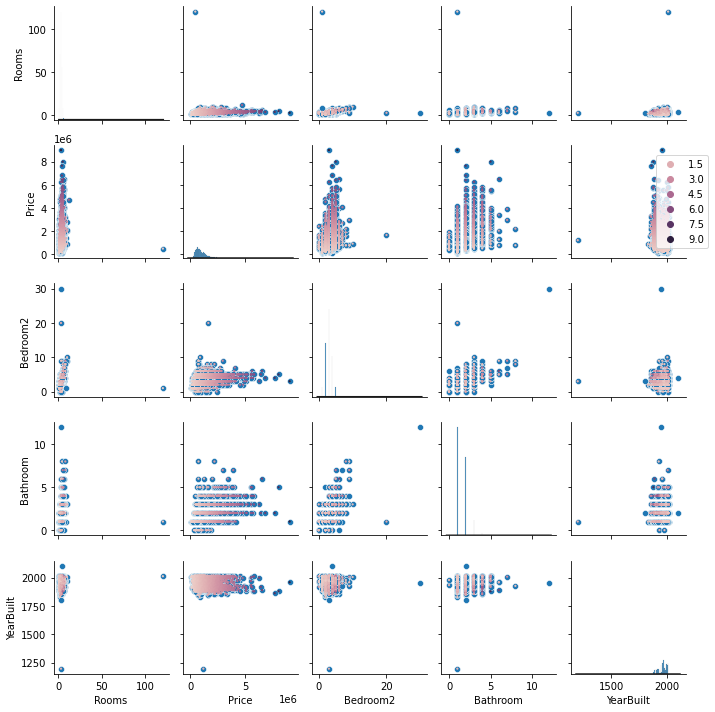

In [ ]:
g = sns.pairplot(df[list(top_corr_features)], height = 2)
g.map_diag(sns.kdeplot, color = '.1')
g.map_offdiag(sns.scatterplot, hue = df['Price'], s = 5, linewidth = 0)
g.axes[1, -1].legend(loc = 'center left', bbox_to_anchor = (0.7, 0.5))
plt.tight_layout()

In [ ]:
df.isnull().sum().sort_values(ascending = False)
## Description, BuildingArea, YearBulit, CouncilArea, Lattitude, Longtitude 삭제
## Landsize, Car, Bathroom, Bedroom2, Propertycount, Distance 평균 대치
## Price null row 삭제

Description      23547
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Landsize          6137
Price             5151
Car               4626
Bathroom          4484
Bedroom2          4481
Lattitude         4304
Longtitude        4304
Propertycount        1
Postcode             1
Distance             1
Regionname           1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
Unnamed: 0           0
dtype: int64

In [ ]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

18523    14
17100    11
16232    11
20968    11
6313     11
         ..
11553     1
5077      1
11551     1
11550     1
8551      1
Length: 23547, dtype: int64

In [ ]:
df.isnull().sum() > 0

Unnamed: 0       False
Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
Description       True
dtype: bool

In [ ]:
d = df.isnull().any()
d

Unnamed: 0       False
Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
Description       True
dtype: bool

In [ ]:
col = df.isnull().sum().sort_values(ascending = False).head(3).index.values
col

array(['Description', 'BuildingArea', 'YearBuilt'], dtype=object)

In [ ]:
df.drop(col, axis = 1, inplace = True)
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0
1,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
df.drop(['CouncilArea', 'Lattitude', 'Longtitude'], axis = 1, inplace = True)

In [ ]:
df.shape

(23547, 17)

In [ ]:
df.drop(['Unnamed: 0', 'Postcode', 'Address'], axis = 1, inplace = True)

In [ ]:
df.loc[~df.Price.isnull(), :]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Propertycount
1,Abbotsford,2,h,1480000.0,S,Biggin,03-12-2016,2.5,2.0,1.0,1.0,202.0,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,04-02-2016,2.5,2.0,1.0,0.0,156.0,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3.0,2.0,0.0,134.0,Northern Metropolitan,4019.0
5,Abbotsford,3,h,850000.0,PI,Biggin,04-03-2017,2.5,3.0,2.0,1.0,94.0,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3.0,1.0,2.0,120.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,Williamstown,2,t,622500.0,SP,Greg,26-08-2017,6.8,2.0,2.0,1.0,NaN,Western Metropolitan,6380.0
23541,Williamstown,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,4.0,1.0,5.0,866.0,Western Metropolitan,6380.0
23544,Yallambie,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,4.0,3.0,2.0,NaN,Northern Metropolitan,1369.0
23545,Yarraville,4,h,1285000.0,SP,Village,26-08-2017,6.3,4.0,1.0,1.0,362.0,Western Metropolitan,6543.0


In [ ]:
# df.Suburb.value_counts() ## 삭제
# df.Type.value_counts() ## 원핫인코딩
# df.Method.value_counts() ## 원핫인코딩
# df.SellerG.value_counts() ## 삭제
# df.Date.value_counts() ## 월별 원핫인코딩
df.Regionname.value_counts() ## 원핫인코딩

Southern Metropolitan         8772
Northern Metropolitan         6480
Western Metropolitan          4561
Eastern Metropolitan          2640
South-Eastern Metropolitan     857
Eastern Victoria               107
Northern Victoria               78
Western Victoria                51
Name: Regionname, dtype: int64

In [ ]:
# Landsize, Car, Bathroom, Bedroom2, Propertycount, Distance 평균 대치
df['Landsize'].fillna((df['Landsize'].mean()), inplace = True)
df['Car'].fillna((df['Car'].mean()), inplace = True)
df['Bathroom'].fillna((df['Bathroom'].mean()), inplace = True)
df['Bedroom2'].fillna((df['Bedroom2'].mean()), inplace = True)
df['Propertycount'].fillna((df['Propertycount'].mean()), inplace = True)
df['Distance'].fillna((df['Distance'].mean()), inplace = True)

In [ ]:
df.shape

(23547, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Rooms          23547 non-null  int64  
 2   Type           23547 non-null  object 
 3   Price          18396 non-null  float64
 4   Method         23547 non-null  object 
 5   SellerG        23547 non-null  object 
 6   Date           23547 non-null  object 
 7   Distance       23547 non-null  float64
 8   Bedroom2       23547 non-null  float64
 9   Bathroom       23547 non-null  float64
 10  Car            23547 non-null  float64
 11  Landsize       23547 non-null  float64
 12  Regionname     23546 non-null  object 
 13  Propertycount  23547 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 2.5+ MB


In [ ]:
# Price null 제거
df = df.loc[~df.Price.isnull(), :]

In [ ]:
df.drop(['Suburb', 'SellerG'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18396 entries, 1 to 23546
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          18396 non-null  int64  
 1   Type           18396 non-null  object 
 2   Price          18396 non-null  float64
 3   Method         18396 non-null  object 
 4   Date           18396 non-null  object 
 5   Distance       18396 non-null  float64
 6   Bedroom2       18396 non-null  float64
 7   Bathroom       18396 non-null  float64
 8   Car            18396 non-null  float64
 9   Landsize       18396 non-null  float64
 10  Regionname     18395 non-null  object 
 11  Propertycount  18396 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.4+ MB


In [ ]:
df['Date'].str[3:].value_counts().sort_index(ascending = True)

01-2016       2
02-2016      35
02-2017     526
03-2017     841
04-2016     401
04-2017     805
05-2016    1167
05-2017    1453
06-2016     962
06-2017    1463
07-2016     553
07-2017    1806
08-2016     911
08-2017    1413
09-2016    1166
09-2017    2035
10-2016     677
11-2016    1413
12-2016     767
Name: Date, dtype: int64

In [ ]:
%%bigquery df

select Rooms
   , case when Type = 'h' then 1 else 0 end as Type_h
   , case when Type = 'u' then 1 else 0 end as Type_u
   , case when Type = 't' then 1 else 0 end as Type_t
   , case when Method = 'S' then 1 else 0 end as Method_S
   , case when Method = 'SP' then 1 else 0 end as Method_SP
   , case when Method = 'PI' then 1 else 0 end as Method_PI
   , case when Method = 'VB' then 1 else 0 end as Method_VB
   , case when Method = 'SA' then 1 else 0 end as Method_SA
   , COALESCE(Distance, avg(Distance)) as Distance
   , COALESCE(Bedroom2, avg(Bedroom2)) as Bedroom2
   , COALESCE(Bathroom, avg(Bathroom)) as Bathroom
   , COALESCE(Car, avg(Car)) as Car
   , COALESCE(Landsize, avg(Landsize)) as Landsize
   , COALESCE(Propertycount, avg(Propertycount)) as Propertycount
   , case when Regionname = 'Southern Metropolitan' then 1 else 0 end as Regionname_SM
   , case when Regionname = 'Northern Metropolitan' then 1 else 0 end as Regionname_NM
   , case when Regionname = 'Western Metropolitan' then 1 else 0 end as Regionname_WM
   , case when Regionname = 'Eastern Metropolitan' then 1 else 0 end as Regionname_EM
   , case when Regionname = 'South-Eastern Metropolitan' then 1 else 0 end as Regionname_SEM
   , case when Regionname = 'Eastern Victoria' then 1 else 0 end as Regionname_EV
   , case when Regionname = 'Northern Victoria' then 1 else 0 end as Regionname_NV
   , case when Regionname = 'Western Victoria' then 1 else 0 end as Regionname_WV
   , case when substring(Date, 4, 10) = '01-2016' then 1 else 0 end as Date_01_2016
   , case when substring(Date, 4, 10) = '02-2016' then 1 else 0 end as Date_02_2016
   , case when substring(Date, 4, 10) = '04-2016' then 1 else 0 end as Date_04_2016
   , case when substring(Date, 4, 10) = '05-2016' then 1 else 0 end as Date_05_2016
   , case when substring(Date, 4, 10) = '06-2016' then 1 else 0 end as Date_06_2016
   , case when substring(Date, 4, 10) = '07-2016' then 1 else 0 end as Date_07_2016
   , case when substring(Date, 4, 10) = '08-2016' then 1 else 0 end as Date_08_2016
   , case when substring(Date, 4, 10) = '09-2016' then 1 else 0 end as Date_09_2016
   , case when substring(Date, 4, 10) = '10-2016' then 1 else 0 end as Date_10_2016
   , case when substring(Date, 4, 10) = '11-2016' then 1 else 0 end as Date_11_2016
   , case when substring(Date, 4, 10) = '12-2016' then 1 else 0 end as Date_12_2016
   , case when substring(Date, 4, 10) = '02-2017' then 1 else 0 end as Date_02_2017
   , case when substring(Date, 4, 10) = '04-2017' then 1 else 0 end as Date_03_2017
   , case when substring(Date, 4, 10) = '04-2017' then 1 else 0 end as Date_04_2017
   , case when substring(Date, 4, 10) = '05-2017' then 1 else 0 end as Date_05_2017
   , case when substring(Date, 4, 10) = '06-2017' then 1 else 0 end as Date_06_2017
   , case when substring(Date, 4, 10) = '07-2017' then 1 else 0 end as Date_07_2017
   , case when substring(Date, 4, 10) = '08-2017' then 1 else 0 end as Date_08_2017
   , case when substring(Date, 4, 10) = '09-2017' then 1 else 0 end as Date_09_2017
   , Price
from table
where Price is not null
  and 
